Confusion Matrix with Ground Truth - Step by Step
Example with Sample Data:
Birth Records (with Death column):
   birth_id forename  surname  death_link
0         1     John    Smith       101.0
1         2     Mary  Johnson         NaN
2         3    James    Brown       103.0
3         4    Alice    Davis         NaN
4         5   Robert   Wilson       105.0

Death Records (with ID column):
   death_id forename surname
0       101     John   Smith
1       102  Michael   Jones
2       103    James   Brown
3       104    Sarah  Miller
4       105   Robert  Wilson
Ground Truth Creation Process:
----------------------------------------
Birth ID 1 -> Death ID 101
  Birth record 'Death' column: 101.0
  Death record 'ID': 101
  Match? True
  Label: 1 (TRUE MATCH)

Birth ID 1 -> Death ID 102
  Birth record 'Death' column: 101.0
  Death record 'ID': 102
  Match? False
  Label: 0 (NO MATCH)

Birth ID 1 -> Death ID 103
  Birth record 'Death' column: 101.0
  Death record 'ID': 103
  Match? False

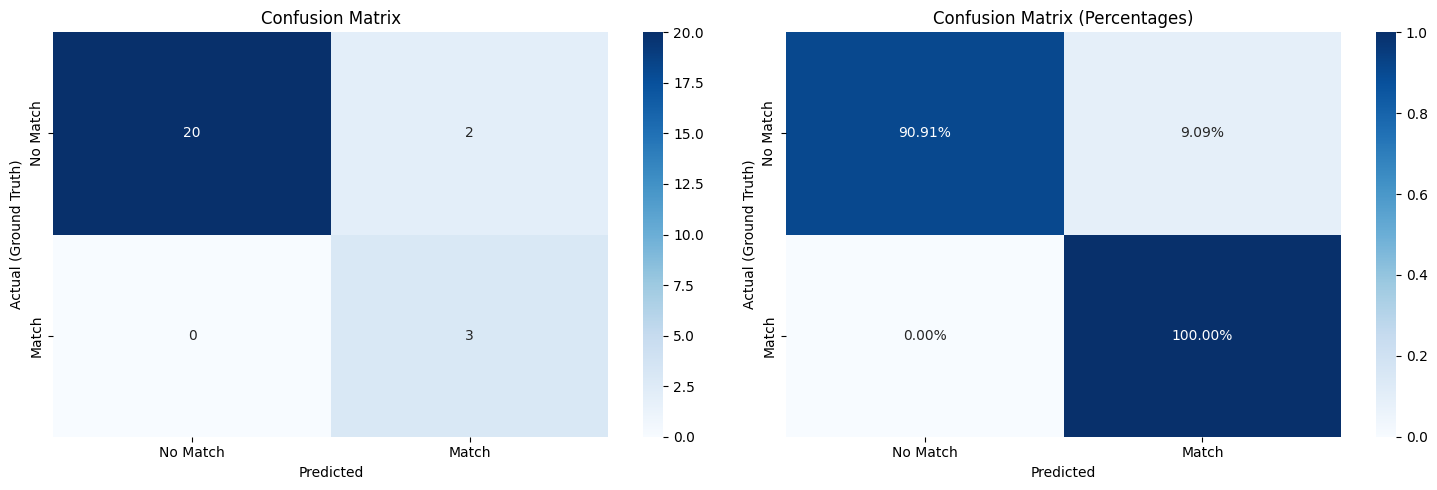

Record Linkage Context:
In record linkage, the confusion matrix tells us:

🔵 True Positives (TP): Record pairs that ARE actual matches
   and were CORRECTLY identified as matches by the model
   → These are successful linkages!

🔴 False Positives (FP): Record pairs that are NOT actual matches
   but were INCORRECTLY identified as matches
   → These are incorrect linkages (Type I error)

🟡 False Negatives (FN): Record pairs that ARE actual matches
   but were MISSED by the model (predicted as non-matches)
   → These are missed linkages (Type II error)

🟢 True Negatives (TN): Record pairs that are NOT actual matches
   and were CORRECTLY identified as non-matches
   → These are correctly rejected pairs

Why this matters in record linkage:
• High Precision: Few false positive linkages (good quality)
• High Recall: Few missed true linkages (good coverage)
• High F1-Score: Good balance between quality and coverage

Ground Truth Validation:
The ground truth is validated because:
1. Birth rec

In [1]:
# Confusion Matrix with Ground Truth - Detailed Explanation
# This code shows exactly how the confusion matrix is created using ground truth

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Confusion Matrix with Ground Truth - Step by Step")
print("=" * 60)


# ## Step 1: Understanding Ground Truth Creation




# Example of how ground truth is created
def create_ground_truth_detailed(birth_df, death_df):
    """
    Create ground truth labels with detailed explanation
    """
    ground_truth = []
    
    print("Ground Truth Creation Process:")
    print("-" * 40)
    
    example_count = 0
    for _, birth_row in birth_df.iterrows():
        birth_id = birth_row['birth_id']
        death_link = birth_row['death_link']  # This is the 'Death' column from birth records
        
        for _, death_row in death_df.iterrows():
            death_id = death_row['death_id']  # This is the 'ID' column from death records
            
            # Ground truth logic: TRUE MATCH if death_link matches death_id
            if pd.notna(death_link) and int(death_link) == death_id:
                label = 1  # TRUE MATCH
                match_type = "TRUE MATCH"
            else:
                label = 0  # NO MATCH
                match_type = "NO MATCH"
            
            ground_truth.append({
                'birth_id': birth_id,
                'death_id': death_id,
                'death_link_value': death_link,
                'label': label,
                'match_type': match_type
            })
            
            # Show first few examples
            if example_count < 5:
                print(f"Birth ID {birth_id} -> Death ID {death_id}")
                print(f"  Birth record 'Death' column: {death_link}")
                print(f"  Death record 'ID': {death_id}")
                print(f"  Match? {death_link == death_id if pd.notna(death_link) else False}")
                print(f"  Label: {label} ({match_type})")
                print()
                example_count += 1
    
    return pd.DataFrame(ground_truth)


# Example with sample data
print("Example with Sample Data:")
print("=" * 30)

# Sample birth records
birth_sample = pd.DataFrame({
    'birth_id': [1, 2, 3, 4, 5],
    'forename': ['John', 'Mary', 'James', 'Alice', 'Robert'],
    'surname': ['Smith', 'Johnson', 'Brown', 'Davis', 'Wilson'],
    'death_link': [101, np.nan, 103, np.nan, 105]  # 'Death' column
})

# Sample death records
death_sample = pd.DataFrame({
    'death_id': [101, 102, 103, 104, 105],  # 'ID' column
    'forename': ['John', 'Michael', 'James', 'Sarah', 'Robert'],
    'surname': ['Smith', 'Jones', 'Brown', 'Miller', 'Wilson']
})

print("Birth Records (with Death column):")
print(birth_sample)
print("\nDeath Records (with ID column):")
print(death_sample)


# Create ground truth for sample data
ground_truth_sample = create_ground_truth_detailed(birth_sample, death_sample)

print("Ground Truth Table:")
print(ground_truth_sample[['birth_id', 'death_id', 'death_link_value', 'label', 'match_type']])


print(f"\nGround Truth Statistics:")
print(f"Total record pairs: {len(ground_truth_sample)}")
print(f"True matches (label=1): {ground_truth_sample['label'].sum()}")
print(f"Non-matches (label=0): {len(ground_truth_sample) - ground_truth_sample['label'].sum()}")


# ## Step 2: How Confusion Matrix Uses Ground Truth


# Simulate model predictions for demonstration
np.random.seed(42)
n_pairs = len(ground_truth_sample)

# Simulate some predictions (in reality, these come from your ML model)
# Let's make realistic predictions where:
# - True matches have higher probability of being predicted as matches
# - Non-matches have lower probability of being predicted as matches

y_true = ground_truth_sample['label'].values
y_pred = np.zeros(n_pairs)

# Simulate predictions with some accuracy
for i in range(n_pairs):
    if y_true[i] == 1:  # True match
        # 80% chance of correct prediction for true matches
        y_pred[i] = np.random.choice([0, 1], p=[0.2, 0.8])
    else:  # Non-match
        # 90% chance of correct prediction for non-matches
        y_pred[i] = np.random.choice([0, 1], p=[0.9, 0.1])


print("Confusion Matrix Breakdown:")
print("=" * 30)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print("                Predicted")
print("                No Match  Match")
print(f"Actual No Match    {cm[0,0]:4d}    {cm[0,1]:4d}")
print(f"       Match       {cm[1,0]:4d}    {cm[1,1]:4d}")


# Detailed breakdown of each quadrant
print(f"\nDetailed Breakdown:")
print(f"True Negatives (TN): {cm[0,0]} - Correctly predicted non-matches")
print(f"False Positives (FP): {cm[0,1]} - Incorrectly predicted as matches")
print(f"False Negatives (FN): {cm[1,0]} - Missed actual matches")
print(f"True Positives (TP): {cm[1,1]} - Correctly predicted matches")


# Show specific examples
print(f"\nSpecific Examples:")
print("-" * 20)

results_df = pd.DataFrame({
    'birth_id': ground_truth_sample['birth_id'],
    'death_id': ground_truth_sample['death_id'],
    'ground_truth': y_true,
    'prediction': y_pred.astype(int),
    'result_type': [''] * n_pairs
})

# Classify each prediction
for i in range(n_pairs):
    if y_true[i] == 1 and y_pred[i] == 1:
        results_df.loc[i, 'result_type'] = 'True Positive (TP)'
    elif y_true[i] == 0 and y_pred[i] == 0:
        results_df.loc[i, 'result_type'] = 'True Negative (TN)'
    elif y_true[i] == 0 and y_pred[i] == 1:
        results_df.loc[i, 'result_type'] = 'False Positive (FP)'
    elif y_true[i] == 1 and y_pred[i] == 0:
        results_df.loc[i, 'result_type'] = 'False Negative (FN)'

print(results_df)


# Calculate metrics from confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"\nMetrics Calculated from Confusion Matrix:")
print(f"Precision = TP/(TP+FP) = {TP}/({TP}+{FP}) = {precision:.3f}")
print(f"Recall = TP/(TP+FN) = {TP}/({TP}+{FN}) = {recall:.3f}")
print(f"F1-Score = 2*(P*R)/(P+R) = {f1_score:.3f}")
print(f"Accuracy = (TP+TN)/(TP+TN+FP+FN) = {accuracy:.3f}")


# ## Step 3: Visualizing the Confusion Matrix


# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Basic confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Match', 'Match'],
            yticklabels=['No Match', 'Match'], ax=ax1)
ax1.set_title('Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual (Ground Truth)')

# Confusion matrix with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['No Match', 'Match'],
            yticklabels=['No Match', 'Match'], ax=ax2)
ax2.set_title('Confusion Matrix (Percentages)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual (Ground Truth)')

plt.tight_layout()
plt.show()


# ## Step 4: Record Linkage Context


print("Record Linkage Context:")
print("=" * 25)
print("In record linkage, the confusion matrix tells us:")
print()
print("🔵 True Positives (TP): Record pairs that ARE actual matches")
print("   and were CORRECTLY identified as matches by the model")
print("   → These are successful linkages!")
print()
print("🔴 False Positives (FP): Record pairs that are NOT actual matches") 
print("   but were INCORRECTLY identified as matches")
print("   → These are incorrect linkages (Type I error)")
print()
print("🟡 False Negatives (FN): Record pairs that ARE actual matches")
print("   but were MISSED by the model (predicted as non-matches)")
print("   → These are missed linkages (Type II error)")
print()
print("🟢 True Negatives (TN): Record pairs that are NOT actual matches")
print("   and were CORRECTLY identified as non-matches")
print("   → These are correctly rejected pairs")
print()

print("Why this matters in record linkage:")
print("• High Precision: Few false positive linkages (good quality)")
print("• High Recall: Few missed true linkages (good coverage)")
print("• High F1-Score: Good balance between quality and coverage")


print(f"\nGround Truth Validation:")
print("=" * 25)
print("The ground truth is validated because:")
print("1. Birth record 'Death' column contains the actual death record ID")
print("2. This creates a definitive link between birth and death records") 
print("3. Any birth-death pair where Death column = Death record ID is a TRUE match")
print("4. All other pairs are NON-matches")
print("5. This gives us objective, reliable labels for training and evaluation")